#Assignment 7: Neural Network

##Part A: Generate random 100 points

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [2]:
#given dataset
data = [[0.9,0.1,1,0],[0.8,0.2,1,0],[0.7,0.3,1,0],[0.95,0.05,1,0],[0.81,0.19,1,0],
        [0.09,0.91,0,1],[0.08,0.92,0,1],[0.07,0.93,0,1],[0.15,0.85,0,1],[0.19,0.81,0,1],
        [0.89,0.11,1,0],[0.78,0.22,1,0],[0.83,0.17,1,0],[0.99,0.01,1,0],[0.69,0.31,1,0],
        [0.23,0.77,0,1],[0.11,0.89,0,1],[0.03,0.97,0,1],[0.01,0.99,0,1],[0.28,0.72,0,1]]


# Generate 150 random samples with [0<=x1<=0.3, 0.7<=x2<=1, y1=0, y2=1]
for i in range(150):
    x1 = round(random.uniform(0, 0.3), 2)
    x2 = round(random.uniform(0.7, 1), 2)
    y1 = 0
    y2 = 1
    data.append([x1, x2, y1, y2])

In [3]:
# Generate 150 random samples with [0.7<=x1<=1, 0<=x2<=0.3, y1=1, y2=0]
for i in range(150):
    x1 = round(random.uniform(0.7, 1), 2)
    x2 = round(random.uniform(0, 0.3), 2)
    y1 = 1
    y2 = 0
    data.append([x1, x2, y1, y2])

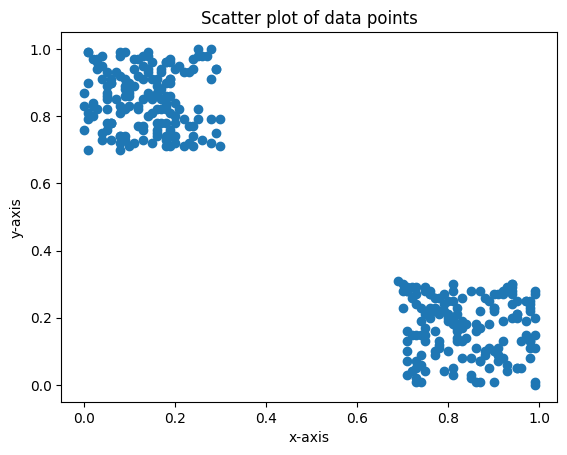

In [4]:
X = [point[0] for point in data]
y = [point[1] for point in data]

plt.scatter(X, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter plot of data points')
plt.show()

In [5]:
#displaying new data
data

[[0.9, 0.1, 1, 0],
 [0.8, 0.2, 1, 0],
 [0.7, 0.3, 1, 0],
 [0.95, 0.05, 1, 0],
 [0.81, 0.19, 1, 0],
 [0.09, 0.91, 0, 1],
 [0.08, 0.92, 0, 1],
 [0.07, 0.93, 0, 1],
 [0.15, 0.85, 0, 1],
 [0.19, 0.81, 0, 1],
 [0.89, 0.11, 1, 0],
 [0.78, 0.22, 1, 0],
 [0.83, 0.17, 1, 0],
 [0.99, 0.01, 1, 0],
 [0.69, 0.31, 1, 0],
 [0.23, 0.77, 0, 1],
 [0.11, 0.89, 0, 1],
 [0.03, 0.97, 0, 1],
 [0.01, 0.99, 0, 1],
 [0.28, 0.72, 0, 1],
 [0.28, 0.91, 0, 1],
 [0.17, 0.82, 0, 1],
 [0.14, 0.93, 0, 1],
 [0.05, 0.93, 0, 1],
 [0.25, 1.0, 0, 1],
 [0.12, 0.82, 0, 1],
 [0.16, 0.82, 0, 1],
 [0.05, 0.86, 0, 1],
 [0.17, 0.85, 0, 1],
 [0.19, 0.76, 0, 1],
 [0.08, 0.72, 0, 1],
 [0.25, 0.98, 0, 1],
 [0.08, 0.99, 0, 1],
 [0.01, 0.99, 0, 1],
 [0.02, 0.97, 0, 1],
 [0.08, 0.7, 0, 1],
 [0.21, 0.95, 0, 1],
 [0.06, 0.9, 0, 1],
 [0.06, 0.78, 0, 1],
 [0.29, 0.94, 0, 1],
 [0.16, 0.74, 0, 1],
 [0.18, 0.73, 0, 1],
 [0.18, 0.82, 0, 1],
 [0.16, 0.91, 0, 1],
 [0.05, 0.85, 0, 1],
 [0.29, 0.94, 0, 1],
 [0.09, 0.86, 0, 1],
 [0.13, 0.76, 0, 1],
 

In [6]:
#combining into dataframe

df = pd.DataFrame(columns=['x1', 'x2', 'y1', 'y2'], data=data)
y = df[['y1', 'y2']]
X = df.drop(['y1', 'y2'], axis=1)

In [7]:
# generating one output node
train_X, test_X, train_y, test_y = train_test_split(X, y['y1'], test_size=0.2, random_state=21)
print(test_y)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

252    1
197    1
215    1
289    1
222    1
      ..
53     0
102    0
127    0
6      0
44     0
Name: y1, Length: 64, dtype: int64


In [8]:
#displaying the model summary

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
# performing the above with two output nodes
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=21)
print(test_y)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

     y1  y2
252   1   0
197   1   0
215   1   0
289   1   0
222   1   0
..   ..  ..
53    0   1
102   0   1
127   0   1
6     0   1
44    0   1

[64 rows x 2 columns]


In [10]:
#displaying the model summary
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [11]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print(model.get_weights())
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))
        
model.fit(train_X, train_y, batch_size=None, epochs=1000, callbacks=[CustomCallback()]) # None means 32

Epoch 1/1000
[array([[ 0.053159  , -0.20361495],
       [ 0.48077416, -0.03904188]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.03151953, -0.23216343],
       [-0.15233946, -0.65256566]], dtype=float32), array([0., 0.], dtype=float32)]
...Training: start of batch 0; got log keys: []
1/8 [==>...........................] - ETA: 9s - loss: 0.8347 - accuracy: 0.5938[array([[ 0.05215915, -0.2046149 ],
       [ 0.47977427, -0.04004183]], dtype=float32), array([-0.00099993, -0.00099997], dtype=float32), array([[-0.03051955, -0.23116344],
       [-0.15133947, -0.6515657 ]], dtype=float32), array([0.00099999, 0.00099999], dtype=float32)]
...Training: start of batch 1; got log keys: []
[array([[ 0.05116449, -0.20560956],
       [ 0.47877452, -0.04104156]], dtype=float32), array([-0.00200111, -0.00200116], dtype=float32), array([[-0.02952627, -0.23016214],
       [-0.15034588, -0.6505643 ]], dtype=float32), array([0.0019933 , 0.00200133], dtype=float32)]
...Training: start of batc

Streaming output truncated to the last 5000 lines.
[array([[ 2.777971 ,  2.4553208],
       [-1.8532715, -2.21193  ]], dtype=float32), array([-0.3319339, -0.118086 ], dtype=float32), array([[ 0.63069236, -0.3229615 ],
       [ 0.87290305, -1.1801566 ]], dtype=float32), array([-0.25143406,  1.2457355 ], dtype=float32)]
...Training: start of batch 3; got log keys: []
[array([[ 2.7782183,  2.4555168],
       [-1.8533708, -2.2119784]], dtype=float32), array([-0.3318084 , -0.11793098], dtype=float32), array([[ 0.63068515, -0.32295364],
       [ 0.87289405, -1.1801457 ]], dtype=float32), array([-0.25139692,  1.2457101 ], dtype=float32)]
...Training: start of batch 4; got log keys: []
[array([[ 2.778436 ,  2.4556923],
       [-1.853599 , -2.2121177]], dtype=float32), array([-0.3318133 , -0.11788236], dtype=float32), array([[ 0.630655  , -0.3229315 ],
       [ 0.87286454, -1.1801215 ]], dtype=float32), array([-0.2514501,  1.2457422], dtype=float32)]
...Training: start of batch 5; got log keys:

In [12]:
model.fit(train_X, train_y, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 11/1000
8/8 [

In [13]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 4.1941e-04 - accuracy: 1.0000 - 225ms/epoch - 112ms/step

Test accuracy: 1.0


##Part B: Loan Dataset

In [14]:
#importing necessary libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

# Load the loan dataset
df = pd.read_excel("loan.xlsx")

df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [15]:
#checking categorical and numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


In [16]:
#converting categorical features into numerical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Res_status'] = encoder.fit_transform(df['Res_status'])
df['Telephone'] = encoder.fit_transform(df['Telephone'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Job_status'] = encoder.fit_transform(df['Job_status'])
df['Liab_ref'] = encoder.fit_transform(df['Liab_ref'])
df['Acc_ref'] = encoder.fit_transform(df['Acc_ref'])
df['Decision'] = encoder.fit_transform(df['Decision'])

df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0,1
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0,1
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200,0
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0,1


In [17]:
#implementing feature selection
X_train=df[df.columns[df.columns!='Decision']]
y_train=df['Decision']

In [18]:
#implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [19]:
coefficients = classifierDT.feature_importances_
columns = list(df.columns)
columns = columns[:13]
# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.40)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

In [20]:
#based on previous chart, we'll drop irrelevant features

df_new = pd.read_excel("loan.xlsx")
df_new.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [21]:
df_new.drop(['Sex', 'Res_status', 'Telephone', 'Liab_ref', 'Acc_ref'], axis=1, inplace=True)
df_new.head()

,Age,Time_at_address,Occupation,Job_status,Time_employed,Time_bank,Home_Expn,Balance,Decision
0,50.750000,0.585,unemploye,unemploye,0,0,145,0,reject
1,19.670000,10.000,labourer,governmen,0,0,140,0,reject
2,52.830002,15.000,creative_,private_s,5,14,0,2200,accept
3,22.670000,2.540,creative_,governmen,2,0,0,0,accept
4,29.250000,13.000,driver,governmen,0,0,228,0,reject


In [22]:
# performing one-hot encoding for transforming categorical into numerical data
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

In [23]:
print('Job_status: ', df_new['Job_status'].unique()) 
print('Occupation: ', df_new['Occupation'].unique()) 

Job_status:  ['unemploye' 'governmen' 'private_s' 'self_empl' 'retired' 'student'
 'military']
Occupation:  ['unemploye' 'labourer' 'creative_' 'driver' 'professio' 'manager'
 'guard_etc' 'executive' 'office_st' 'productio' 'semi_pro' 'sales']


In [24]:
features_array = onehot_encoder.fit_transform(df_new[['Job_status', 'Occupation']]).toarray()

features_array

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [25]:
feature_labels = ['governmen', 'military', 'private_s', 'retired', 'self_empl',
        'student', 'unemploye', 'creative_', 'driver', 'executive', 'guard_etc', 'labourer',
        'manager', 'office_st', 'productio', 'professio', 'sales',
        'semi_pro', 'unemploye']
feature_labels

['governmen',
 'military',
 'private_s',
 'retired',
 'self_empl',
 'student',
 'unemploye',
 'creative_',
 'driver',
 'executive',
 'guard_etc',
 'labourer',
 'manager',
 'office_st',
 'productio',
 'professio',
 'sales',
 'semi_pro',
 'unemploye']

In [26]:
#making a features dataframe consisting of columns after one-hot encoding Job-status and occupation columns. #splitting the dataset into X (independent) and y (dependent/target)
features = pd.DataFrame(features_array, columns = feature_labels)


In [27]:
#merging the original dataframe and the features matrix
dataset = pd.concat([df_new, features], axis=1)       

dataset

,Age,Time_at_address,Occupation,Job_status,Time_employed,Time_bank,Home_Expn,Balance,Decision,governmen,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
0,50.750000,0.585,unemploye,unemploye,0,0,145,0,reject,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.670000,10.000,labourer,governmen,0,0,140,0,reject,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.830002,15.000,creative_,private_s,5,14,0,2200,accept,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.670000,2.540,creative_,governmen,2,0,0,0,accept,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.250000,13.000,driver,governmen,0,0,228,0,reject,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,guard_etc,self_empl,2,0,232,200,reject,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425,22.250000,1.250,unemploye,unemploye,3,0,280,0,reject,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426,23.330000,1.500,creative_,governmen,1,0,422,200,accept,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,21.000000,4.790,productio,private_s,2,1,80,300,accept,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
dataset['Decision']

0      reject
1      reject
2      accept
3      accept
4      reject
        ...  
424    reject
425    reject
426    accept
427    accept
428    reject
Name: Decision, Length: 429, dtype: object

In [29]:
dataset['Decision'] = encoder.fit_transform(dataset['Decision'])

In [30]:
#removing the occupation and job-status columns as they are already one-hot encoded

dataset.drop(['Occupation','Job_status'], axis=1, inplace=True)       
dataset

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,governmen,military,private_s,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
0,50.750000,0.585,0,0,145,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.670000,10.000,0,0,140,0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.830002,15.000,5,14,0,2200,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.670000,2.540,2,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.250000,13.000,0,0,228,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425,22.250000,1.250,3,0,280,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426,23.330000,1.500,1,0,422,200,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,21.000000,4.790,2,1,80,300,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
dataset.columns

Index(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance', 'Decision', 'governmen', 'military', 'private_s', 'retired',
       'self_empl', 'student', 'unemploye', 'creative_', 'driver', 'executive',
       'guard_etc', 'labourer', 'manager', 'office_st', 'productio',
       'professio', 'sales', 'semi_pro', 'unemploye'],
      dtype='object')

In [32]:
corr = dataset.corr()
corr

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,governmen,military,private_s,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
Age,1.000000,0.217342,0.426890,0.208736,-0.072254,0.101819,-0.181241,0.011700,-0.054508,-0.247584,...,0.195693,0.028675,-0.035318,0.056127,-0.085265,-0.025142,-0.008012,-0.061906,-0.002900,0.210038
Time_at_address,0.217342,1.000000,0.278849,0.202083,-0.267470,0.072235,-0.163298,0.032959,-0.022068,-0.083958,...,0.194672,-0.074592,-0.027105,-0.062565,0.060743,0.007001,-0.023361,0.018662,-0.069254,0.028853
Time_employed,0.426890,0.278849,1.000000,0.291542,-0.110933,0.112719,-0.339833,0.135908,-0.027837,-0.172712,...,0.158402,-0.048504,-0.076296,0.085916,0.045731,-0.005221,0.065455,-0.080398,0.001919,-0.042615
Time_bank,0.208736,0.202083,0.291542,1.000000,-0.111761,0.153435,-0.455942,0.097365,-0.003413,-0.115185,...,0.070908,-0.079085,-0.102461,-0.004365,0.115238,-0.035694,0.030341,-0.087884,0.042998,-0.026283
Home_Expn,-0.072254,-0.267470,-0.110933,-0.111761,1.000000,0.080366,0.087311,0.059496,-0.005677,0.035104,...,-0.022788,0.070586,-0.024372,0.121765,-0.017424,0.048673,0.112318,-0.049655,0.094591,-0.139506
Balance,0.101819,0.072235,0.112719,0.153435,0.080366,1.000000,-0.191858,-0.042154,-0.003950,-0.037121,...,0.153182,-0.025923,-0.053978,-0.023879,-0.008416,-0.028536,0.004505,-0.028959,0.138420,-0.020692
Decision,-0.181241,-0.163298,-0.339833,-0.455942,0.087311,-0.191858,1.000000,-0.158575,0.043507,0.044389,...,-0.067796,0.131258,0.107222,0.029066,-0.133674,-0.028458,-0.165153,0.033932,-0.134504,0.173276
governmen,0.011700,0.032959,0.135908,0.097365,0.059496,-0.042154,-0.158575,1.000000,-0.023497,-0.617936,...,-0.079377,-0.036600,0.019390,-0.080452,0.179558,-0.050329,0.191944,-0.089877,0.117460,-0.133296
military,-0.054508,-0.022068,-0.027837,-0.003413,-0.005677,-0.003950,0.043507,-0.023497,1.000000,-0.061444,...,-0.010689,-0.014407,-0.015924,-0.012773,-0.017357,-0.016547,-0.010966,-0.013490,-0.010689,-0.013254
private_s,-0.247584,-0.083958,-0.172712,-0.115185,0.035104,-0.037121,0.044389,-0.617936,-0.061444,1.000000,...,-0.190084,-0.203628,0.081608,0.130195,-0.004043,0.175375,-0.066073,0.163973,-0.030814,-0.348558


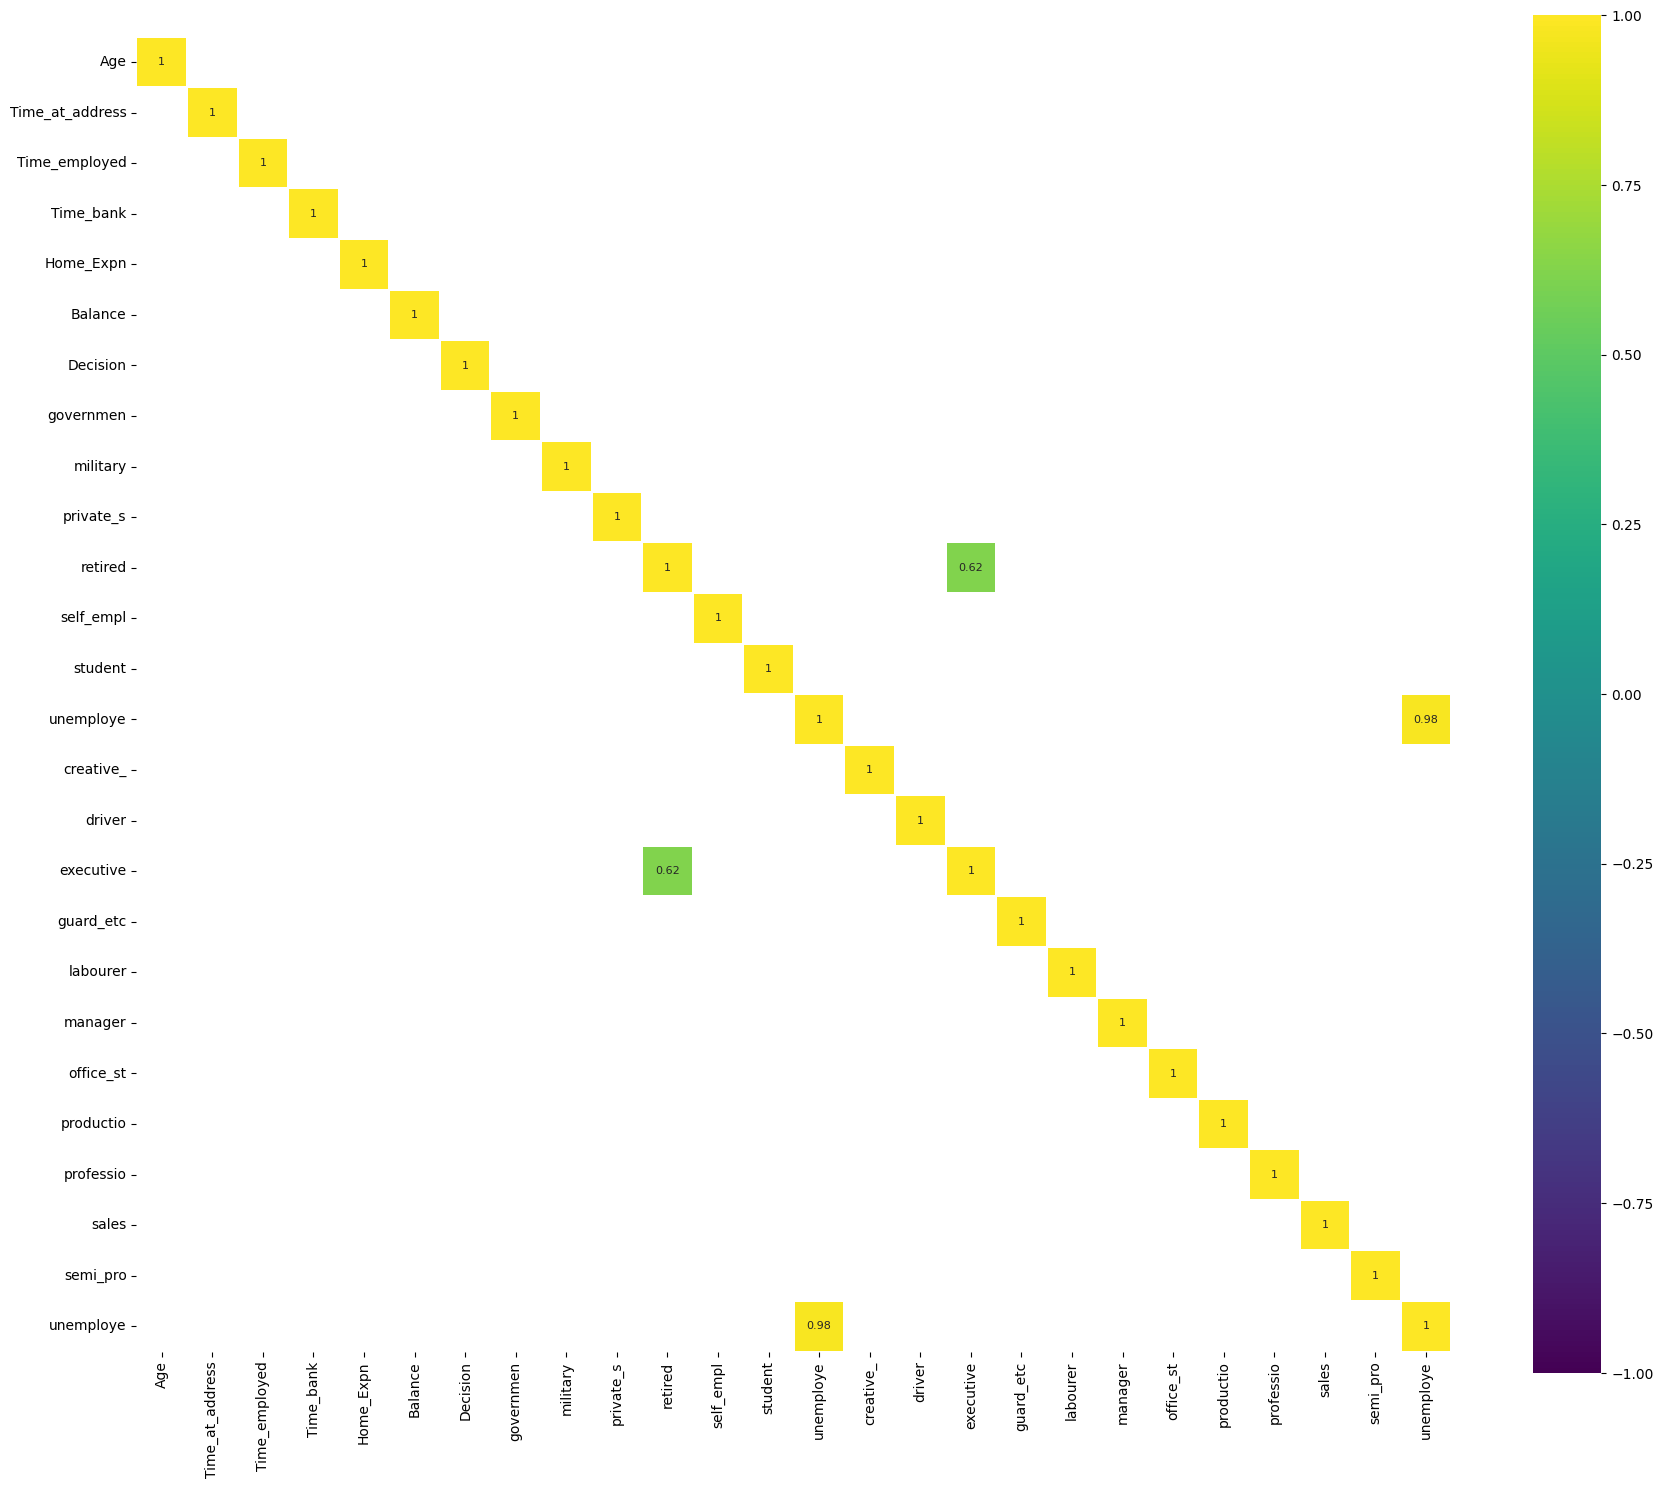

In [33]:
#plotting the correlation matrix
plt.figure(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.7)],       #here displaying values >=0.6 or <=-0.7
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [34]:
#splitting data into X (independent) and y (independent)

X = dataset[dataset.columns[dataset.columns != 'Decision']]
y = dataset['Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
#implementing neural network model

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print(model.get_weights())
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))
        
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, callbacks=[CustomCallback()]) # None means 32

Epoch 1/1000
[array([[ 3.14277768e-01, -1.57366142e-01, -6.50291443e-02,
        -3.11226487e-01,  3.64663899e-01,  1.60622597e-01,
         1.37894690e-01,  3.89545560e-01,  3.81556332e-01,
        -2.52444208e-01],
       [-3.41137648e-02,  2.15343595e-01, -2.08621845e-01,
        -3.95843148e-01,  3.03576589e-02, -1.97794363e-01,
         1.43666744e-01, -3.09122354e-01, -1.19496495e-01,
         3.48654866e-01],
       [-2.37890869e-01, -3.04066181e-01, -3.48029763e-01,
        -1.69002607e-01, -1.15398765e-02,  8.12895298e-02,
         3.35656166e-01, -3.15619022e-01,  3.44203770e-01,
         6.22275472e-03],
       [ 2.04024732e-01, -2.07582161e-01, -3.73674512e-01,
         1.11341238e-01, -2.68394291e-01, -2.85466522e-01,
        -3.18564802e-01, -2.66404212e-01, -2.46148378e-01,
        -2.42706805e-01],
       [ 1.69126570e-01, -3.25146168e-01, -9.92117524e-02,
         3.93179238e-01, -1.34281099e-01, -1.73880383e-01,
         5.12562692e-02,  5.33810854e-02, -3.14265668e-0

Streaming output truncated to the last 5000 lines.
         3.53760302e-01,  5.86038411e-01, -6.34264708e-01,
        -1.31114334e-01],
       [-5.31742811e-01,  1.91348159e+00, -1.48872018e+00,
         5.75212181e-01, -6.33397818e-01,  2.04673862e+00,
         5.82141280e-01,  7.34270573e-01, -1.50819659e-01,
         1.45916820e-01],
       [-5.94850779e-01,  2.53945804e+00,  1.03632438e+00,
         9.36428457e-02, -5.94302714e-01,  1.12178934e+00,
         6.43086374e-01, -1.18228257e-01,  3.67785811e-01,
         1.85935855e-01],
       [-1.35304546e+00,  1.61918569e+00, -4.94026840e-01,
        -3.64481735e+00, -9.99621511e-01,  5.37415326e-01,
         3.04741597e+00,  1.81277454e+00,  1.69329488e+00,
        -3.62494200e-01],
       [-1.36092746e+00, -7.92949736e-01,  9.95420218e-02,
        -1.24222386e+00, -2.72905111e+00, -7.44345844e-01,
         1.03322577e+00,  1.15658867e+00, -1.09761469e-01,
        -1.53924525e-02],
       [-2.14807346e-01, -1.00795887e-01,  3.6801603

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         3.15356348e-03,  4.34293926e-01, -8.34976435e-01,
         2.73159474e-01, -6.89197481e-01,  1.14680362e+00,
         6.22275472e-03],
       [ 3.23343962e-01, -1.25908685e+00,  8.60838354e-01,
        -3.05215627e-01, -6.13899410e-01, -1.83304191e+00,
        -5.24246931e-01, -3.90064120e-01,  1.39475167e+00,
        -2.42706805e-01],
       [ 5.21180741e-02, -1.40701994e-01, -2.09189743e-01,
         3.05899531e-01, -9.45749655e-02, -1.26971096e-01,
         1.66970909e-01,  1.62248939e-01, -3.17530692e-01,
        -2.45567799e-01],
       [ 2.38543063e-01,  6.84655085e-02,  2.60809548e-02,
        -1.25172019e-01,  3.36434186e-01,  3.54290307e-02,
         1.22065227e-02, -7.92539865e-03, -1.52194276e-01,
        -2.54437357e-01],
       [-5.75978346e-02,  6.66327775e-02,  7.37387598e-01,
         5.23082137e-01, -7.61407197e-01,  6.05804026e-01,
         5.08265346e-02,  1.37204379e-01,  9.54442739e-01,
        -1.38757080

In [37]:
#calculating the acccuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

3/3 - 0s - loss: 1.2956 - accuracy: 0.7326 - 198ms/epoch - 66ms/step

Test accuracy: 0.7325581312179565

Test loss: 0.7325581312179565
